## Análisis de la Calidad del Sueño: Impactos de la Profesión, Actividad Física y Factores Demográficos


### Exploración de relaciones entre calidad del sueño, estrés, actividad física y características individuales en diversas categorías profesionales y demográficas.

#### ANALISIS DE SUEÑO 
¿ Quien tiene mejor calidad de sueño, Hombres o mujeres? 
¿ Existe una relacion entre la calidad del sueño y su profecion? 
¿ La actividad fisica afecta el sueño?, ¿ Que profesion presenta peor calidad de sueño?
¿ Cual profecion tiene mayor nivel de estres y el mayor indice de masa corporal? 
¿ En que edades se encuentra la mayor cantidad de trastornos de sueño?
¿ La cantidad de pasos en el dia ¿ Afecta la calidad de sueño ?
¿ Al indice de masa corporal ?

##### Autor: Isaias perez sarmiento

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ruta_archivo = "C:/Users/isape/OneDrive/Documentos/Panda/BACES DE DATOS ecxel/sleep health.csv"
df = pd.read_csv(ruta_archivo, index_col='Person ID')
df.head()      

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
Person ID,,,,,,,,,,,,
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [3]:
df.describe()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 374 entries, 1 to 374
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Blood Pressure           374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 38.0+ KB


Analisis de edades:

In [5]:
total_gender=df['Gender'].value_counts()

C:\Users\isape\AppData\Local\Temp\ipykernel_11628\80473476.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap("Blues")


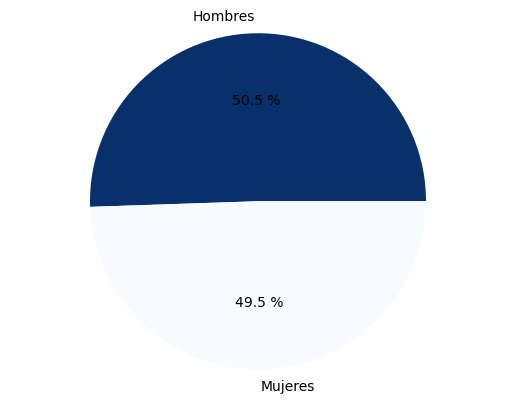

In [6]:
from matplotlib import cm
from matplotlib import colors

normdata = colors.Normalize(min(total_gender), max(total_gender))
colormap = cm.get_cmap("Blues")
colores =colormap(normdata(total_gender))
plt.pie(total_gender, labels=['Hombres', 'Mujeres'], autopct="%0.1f %%", colors=colores)
plt.axis("equal");

In [7]:
df['Age'].mean() #promedio de edades, aunque ya este en la tabla de df.describe() se puede hallar de esta forma igualmente.

42.18449197860963

In [8]:
df.loc[df['Age'] <=40, 'Age_group']='Adult'
df.loc[df['Age'] >=41, 'Age_group']='Older Adult'

In [9]:
df.head(7)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Age_group
Person ID,,,,,,,,,,,,,
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN,Adult
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,Adult
3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,Adult
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,Adult
5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,Adult
6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia,Adult
7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia,Adult


In [10]:
df.tail(7)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Age_group
Person ID,,,,,,,,,,,,,
368,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,Older Adult
369,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,Older Adult
370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,Older Adult
371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,Older Adult
372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,Older Adult
373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,Older Adult
374,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,Older Adult


In [11]:
total_adult=df['Age_group'].value_counts()

C:\Users\isape\AppData\Local\Temp\ipykernel_11628\2042809589.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap("Blues")


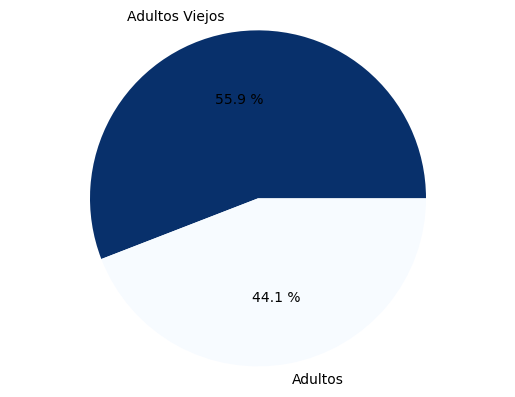

In [12]:
from matplotlib import cm
from matplotlib import colors

normdata = colors.Normalize(min(total_adult), max(total_adult))
colormap = cm.get_cmap("Blues")
colores =colormap(normdata(total_adult))
plt.pie(total_adult, labels=['Adultos Viejos', 'Adultos'], autopct="%0.1f %%", colors=colores)
plt.axis("equal");

In [13]:
df.groupby('Gender')['Age'].agg({'mean', 'std'})

,mean,std
Gender,,
Female,47.405405,8.093407
Male,37.074074,5.662006


Analisis de ocupaciones:


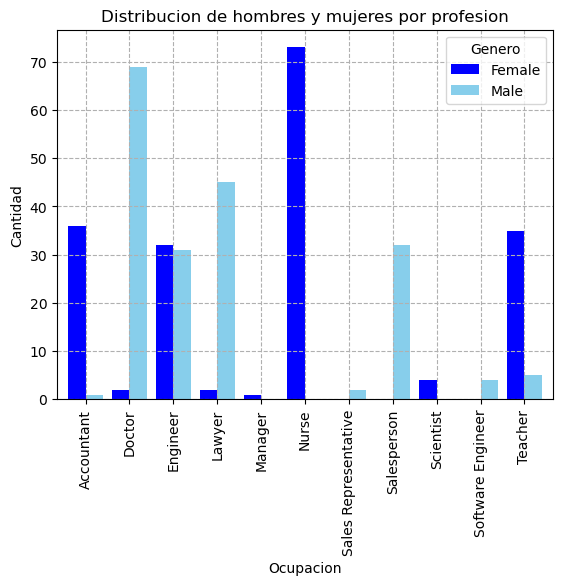

In [14]:
df.groupby(['Occupation','Gender']).size().unstack().plot(kind='bar', stacked=False, color=['blue', 'skyblue'], width=0.8)
plt.title('Distribucion de hombres y mujeres por profesion')
plt.xlabel('Ocupacion')
plt.ylabel('Cantidad')
plt.legend(title='Genero')
plt.grid(ls="dashed")
plt.show()

In [15]:
df['Sleep Duration'].min(), df['Sleep Duration'].max()

(5.8, 8.5)

<Figure size 1500x1000 with 0 Axes>

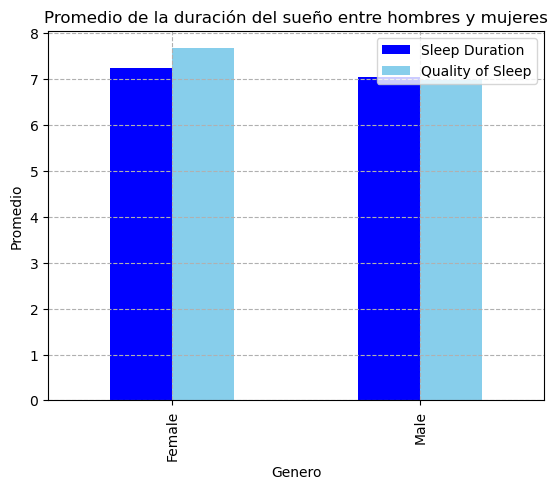

In [16]:
date_sleep=df.groupby('Gender')[['Sleep Duration', 'Quality of Sleep']].mean()
fig = plt.figure(figsize=(15, 10))
date_sleep.plot(kind='bar', color=['blue', 'skyblue'], width=0.5)
plt.title('Promedio de la duración del sueño entre hombres y mujeres')
plt.xlabel('Genero')
plt.ylabel('Promedio')
plt.grid(ls="--")
plt.show()

<Figure size 2500x1500 with 0 Axes>

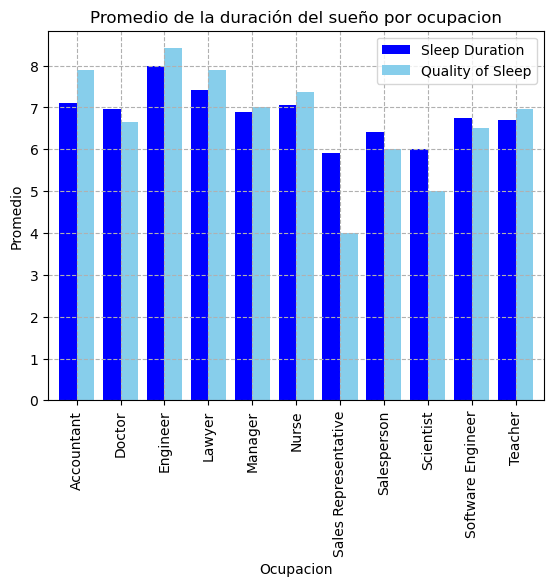

In [17]:
isa_date=df.groupby('Occupation')[['Sleep Duration', 'Quality of Sleep']].mean()
isa_date.sort_values(by='Quality of Sleep') # Para ordenar esta columna de menor a mayor. 
fig = plt.figure(figsize=(25, 15))
isa_date.plot(kind='bar', color=['blue', 'skyblue'], width=0.8)
plt.title('Promedio de la duración del sueño por ocupacion')
plt.xlabel('Ocupacion')
plt.ylabel('Promedio')
plt.grid(ls="--")
plt.show()

In [18]:
bmi_data=df.groupby('Occupation')['BMI Category'].value_counts()
bmi_data.sort_values()

Occupation            BMI Category 
Lawyer                Normal Weight     1
Software Engineer     Overweight        1
                      Obese             1
Manager               Overweight        1
Teacher               Obese             1
Doctor                Normal Weight     2
Lawyer                Obese             2
                      Overweight        2
Software Engineer     Normal Weight     2
Sales Representative  Obese             2
Engineer              Overweight        3
                      Normal Weight     4
Doctor                Obese             4
Scientist             Overweight        4
Accountant            Normal Weight     5
                      Overweight        6
Teacher               Normal            6
Nurse                 Normal Weight     7
Accountant            Normal           26
Salesperson           Overweight       32
Teacher               Overweight       33
Lawyer                Normal           42
Engineer              Normal           5

In [19]:
isa_data=df.groupby('Occupation')[['Daily Steps', 'Physical Activity Level', 'Sleep Duration', 'Quality of Sleep']].mean()
isa_data.sort_values(by='Daily Steps')

,Daily Steps,Physical Activity Level,Sleep Duration,Quality of Sleep
Occupation,,,,
Sales Representative,3000.000000,30.000000,5.900000,4.000000
Scientist,5350.000000,41.000000,6.000000,5.000000
Manager,5500.000000,55.000000,6.900000,7.000000
Software Engineer,5800.000000,48.000000,6.750000,6.500000
Teacher,5957.500000,45.625000,6.690000,6.975000
Engineer,5980.952381,51.857143,7.987302,8.412698
Salesperson,6000.000000,45.000000,6.403125,6.000000
Doctor,6808.450704,55.352113,6.970423,6.647887
Accountant,6881.081081,58.108108,7.113514,7.891892


In [20]:
 df.query('Occupation == "Doctor"') # esta info es extra te muestra los valores de una columna en especifico ejemplo;
#df.query('Revenue > 100_000 & Employees > 100_000')
#df.query('City in ["California", "Tokyo"]')


,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Age_group
Person ID,,,,,,,,,,,,,
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,Adult
3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,Adult
8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN,Adult
9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN,Adult
10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,Male,48,Doctor,7.3,7,65,5,Obese,142/92,83,3500,Insomnia,Older Adult
277,Male,49,Doctor,8.1,9,85,3,Obese,139/91,86,3700,Sleep Apnea,Older Adult
278,Male,49,Doctor,8.1,9,85,3,Obese,139/91,86,3700,Sleep Apnea,Older Adult
